# Histogram Equalization

픽셀값이 한쪽에 몰려있는 이미지를 더 보기좋게 만들어주는 cv2.calcHist()함수를 직접 구현해보자

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## my_calcHist

In [2]:
def my_calcHist(src):

    h, w = src.shape[:2]
    hist = np.zeros((256,), dtype = np.int)
    for row in range(h):
        for col in range(w):
            intensity = src[row, col]
            hist[intensity] += 1
    return hist

흑백으로 받은 이미지(src)를 받아 각 픽셀별 value를 히스토그램(hist)에 넣어줍니다.
value는 0~255까지 가지기 때문에 히스토그램의 shape은 (256,)입니다.

## my_normalize_hist

In [3]:
def my_normalize_hist(hist, pixel_num):
    
    normalized_hist = np.zeros((256,), dtype = np.float)
    for i in range(len(hist)):
        normalized_hist[i] = hist[i]/pixel_num
    return normalized_hist

hist를 normalization하는 함수로, 전체 픽셀 수를 나눠줍니다.

## my_PDF2CDF

In [4]:
def my_PDF2CDF(pdf):

    cdf = np.zeros((256,), dtype = np.float)
    cdf[0] = pdf[0]
    for i in range(1,len(pdf)):
        cdf[i] = cdf[i-1] + pdf[i]
    return cdf

정확한 pdf, cdf는 아니지만, 이 함수들과 유사한 형태로 만들어줍니다.
(각 픽셀을 equalization 시킬 때 처음 pdf를 적분해 cdf로 가는 형태와 유사해서 위와같이 구현함)

## my_denoramlize

In [5]:
def my_denormalize(normalized, gray_level):

    denormalized = np.zeros((256,), dtype = np.float)
    for i in range(len(normalized)):
        denormalized[i] = normalized[i]*gray_level
    return denormalized

처음 들어온 value(0~255)의 각 값을 다른 곳으로 보내기위해 필요한 단계입니다.
그래서 처음 들어온 value와 비율을 맞추기 위해 gray_level(픽셀 value의 최댓값)을 곱해줍니다

## my_calcHist_equalization

In [6]:
def my_calcHist_equalization(denormalized, hist):

    hist_equal = np.zeros((256,), dtype = np.int)
    for i in range(len(denormalized)):
        hist_equal[denormalized[i]] += hist[i]
    return hist_equal

hist에 입력받은 value들을 denormalized위 위치에 맞게 새로운 함수(hist_equal)에 넣어 중앙에 몰려있는 히스토그램을 넓고 평평하게 만들어줍니다.

## my_equal_img

In [7]:
def my_equal_img(src, output_gray_level):

    h, w = src.shape[:2]
    dst = np.zeros((h,w), dtype = np.uint8)
    for row in range(h):
        for col in range(w):
            dst[row, col] = output_gray_level[src[row, col] + 1]

    return dst

흑백 이미지(src)의 픽셀값을 denormalized된 픽셀값으로 변경시켜줍니다.

## my_hist_equal

In [8]:
def my_hist_equal(src):
    (h, w) = src.shape
    max_gray_level = 255
    histogram = my_calcHist(src)
    normalized_histogram = my_normalize_hist(histogram, h * w)
    normalized_output = my_PDF2CDF(normalized_histogram)
    denormalized_output = my_denormalize(normalized_output, max_gray_level)
    output_gray_level = denormalized_output.astype(int)
    hist_equal = my_calcHist_equalization(output_gray_level, histogram)

    ### dst : equalization 결과 image
    dst = my_equal_img(src, output_gray_level)

    return dst, hist_equal

모든 작업을 적용하는 함수입니다.

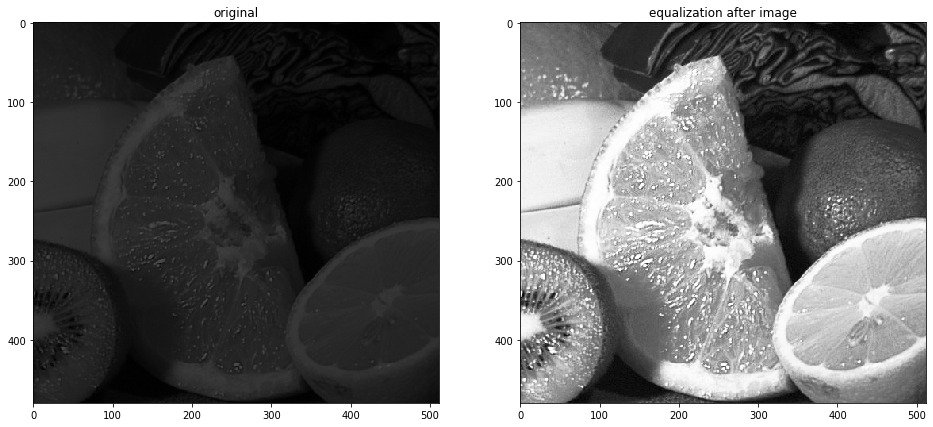

In [9]:

src = cv2.imread('fruits_div3.jpg', cv2.IMREAD_GRAYSCALE)
hist = my_calcHist(src)
dst, hist_equal = my_hist_equal(src)


fig, ax = plt.subplots(1,2, figsize = (16,9))
ax[0].set_title('original')
ax[0].imshow(cv2.cvtColor(src,cv2.COLOR_GRAY2RGB))

ax[1].set_title('equalization after image')
ax[1].imshow(cv2.cvtColor(dst,cv2.COLOR_GRAY2RGB))
plt.show()


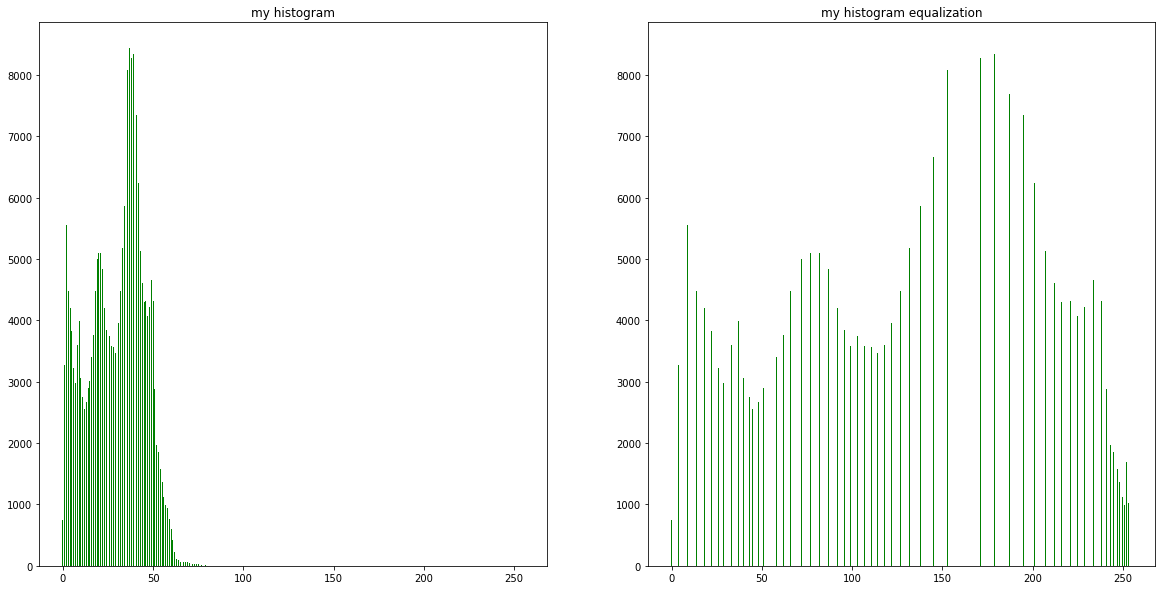

In [10]:

fig, ax = plt.subplots(1,2, figsize = (20,10))
ax[0].set_title('my histogram')
binX = np.arange(len(hist))
ax[0].bar(binX, hist, width=0.5, color='g')

ax[1].set_title('my histogram equalization')
binX = np.arange(len(hist_equal))
ax[1].bar(binX, hist_equal, width=0.5, color='g')
plt.show()

처음 original image는 상당히 어두운 것을 육안으로 확인할 수 있고, histogram으로 확인시 대부분의 값이 60보다 작은 어두운 image임을 알 수 있습니다.

histogram equalization을 적용시킨 equalization after image의 경우 original사진과 비교해 상당히 밝아짐을 알 수 있고, histogram 으로 확인시 값이 펼쳐져 있고, 왼쪽보단 평평한 것을 확인할 수 있습니다.